# MA(q) Parameter Estimation

The moving average model of order $q$, denoted by $\text{MA}(q)$, is defined by,

$
\begin{align}
X_t = \sum_{i=1}^q \vartheta_i \varepsilon_{t-i} + \varepsilon_t
\end{align}
$

where $\varepsilon_t$ are independent and identically distributed random variables with distribution,

$
\begin{align}
\varepsilon_i \sim \text{Normal}(0, \sigma)
\end{align}
$

It follows that,

$
\begin{align}
&\text{E}[\varepsilon_t] = 0 \\
&\text{E}[\varepsilon_t^2] = \sigma^2 \\
&\text{E}[\varepsilon_t \varepsilon_s] = \delta_{ts} \sigma^2
\end{align}
$

Here the $\vartheta_i$ are estimated given an $MA(q)$ time series. 

## Includes

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib import (DataType, DataSchema, DataFunc, SourceType, DataSource, perform_est, EstType)
from lib import (stack, FuncPlotType, fpoints, fcurve)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations ($\sigma = 1$)

In [2]:
nsample = 1000
σ = 1.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

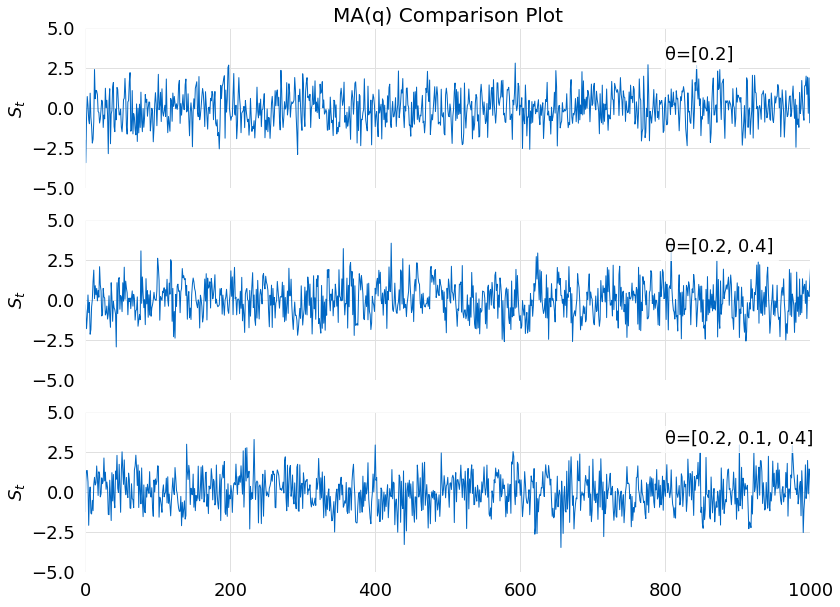

In [3]:
stack(ma, ylim=[-5.0, 5.0], title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [4]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -1417.300
Date:                Mon, 16 May 2022   AIC                           2840.601
Time:                        08:53:28   BIC                           2855.327
Sample:                             0   HQIC                          2846.198
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0074      0.039      0.192      0.848      -0.068       0.083
ma.L1          0.2275      0.032      7.020      0.000       0.164       0.291
sigma2         0.9938      0.047     21.343      0.000       0.903       1.085
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.83   Prob(JB):                         0.38
Heteroskedasticity (H):               0.90   Skew:                            -0.06
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.82
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [5]:
ma[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 1.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.007439044308037921, 0.03870139442072678],
    'Parameters': [[0.22753095766760192, 0.032412682931009004]],
    'Sigma2': [0.993845280452628, 0.04656646366716019]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:27',
 'Name': 'MA(1)-Simulation-ad17ea9f-5b4b-44bb-9d92-3d5c5f31e753'}

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [6]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -1415.928
Date:                Mon, 16 May 2022   AIC                           2839.856
Time:                        08:53:28   BIC                           2859.491
Sample:                             0   HQIC                          2847.318
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0198      0.048      0.411      0.681      -0.075       0.114
ma.L1          0.1391      0.031      4.513      0.000       0.079       0.200
ma.L2          0.3895      0.029     13.630      0.000       0.333       0.446
sigma2         0.9908      0.047     21.211      0.000       0.899       1.082
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 2.62
Prob(Q):                              0.77   Prob(JB):                         0.27
Heteroskedasticity (H):               1.17   Skew:                             0.08
Prob(H) (two-sided):                  0.16   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [7]:
ma[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 1.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.019826125572037417, 0.048239565013332576],
    'Parameters': [[0.1391267056084512, 0.030831000289478855],
     [0.38950941117752547, 0.028577577264439803]],
    'Sigma2': [0.9908427856912622, 0.04671377494954831]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:27',
 'Name': 'MA(2)-Simulation-98e008d4-949c-49bd-9be6-8df300cb582b'}

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [8]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -1405.140
Date:                Mon, 16 May 2022   AIC                           2820.280
Time:                        08:53:28   BIC                           2844.824
Sample:                             0   HQIC                          2829.608
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0130      0.051      0.254      0.799      -0.087       0.113
ma.L1          0.1919      0.029      6.548      0.000       0.134       0.249
ma.L2          0.0683      0.030      2.250      0.024       0.009       0.128
ma.L3          0.3725      0.030     12.494      0.000       0.314       0.431
sigma2         0.9696      0.043     22.803      0.000       0.886       1.053
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                 0.46
Prob(Q):                              0.79   Prob(JB):                         0.79
Heteroskedasticity (H):               1.03   Skew:                            -0.03
Prob(H) (two-sided):                  0.76   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
ma[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 1.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.01296714900151354, 0.051052204551251944],
    'Parameters': [[0.19187486680604385, 0.029303579088256364],
     [0.06829272855092611, 0.03035635484395775],
     [0.372477346268085, 0.02981354573490949]],
    'Sigma2': [0.9695724212972889, 0.04251969257887408]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:27',
 'Name': 'MA(3)-Simulation-2d97685f-9b18-4ba1-b306-55a18a210f58'}

## Simulations ($\sigma = 5$)

In [10]:
nsample = 1000
σ = 5.0
θ_vals = [[0.2], [0.2, 0.4], [0.2, 0.1, 0.4]]
params = [{"θ": θ, "σ": σ, "xmax": nsample} for θ in θ_vals]
title = "MA(q) Comparison Plot"
labels = [f"θ={val}" for val in θ_vals] 
ma = DataSource.create_parameter_scan(SourceType.MA, *params)

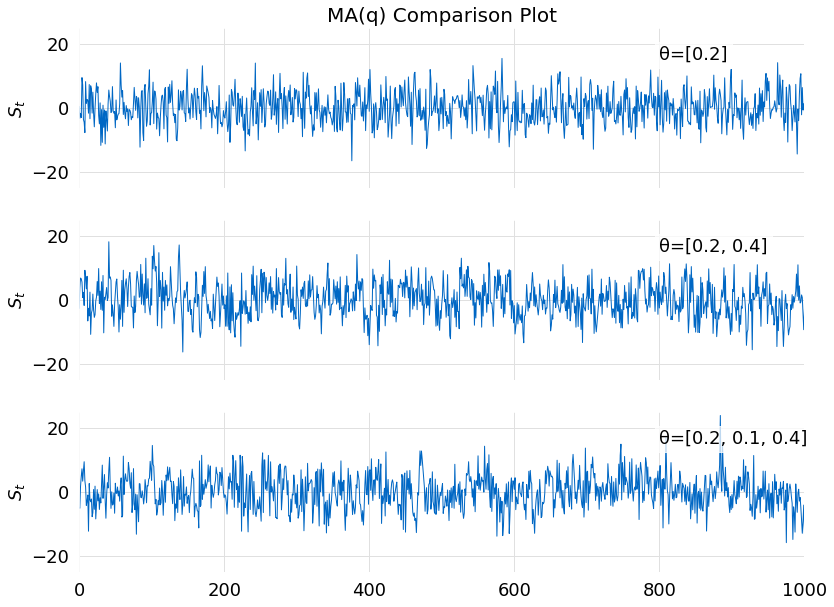

In [11]:
stack(ma, ylim=[-25.0, 25.0], title=title, labels=labels, data_type=DataType.TIME_SERIES)

## Estimation of $\text{MA}(q)$ Parameters

$\text{MA}(q)$ parameters are estimated using `statsmodels.tsa.arima_model.ARMA`

### $\text{MA}(1)$ Example ($\varphi = 0.2$)

In [12]:
results = perform_est(ma[0], EstType.MA, order=1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -3017.167
Date:                Mon, 16 May 2022   AIC                           6040.333
Time:                        08:53:28   BIC                           6055.059
Sample:                             0   HQIC                          6045.930
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2145      0.184      1.169      0.243      -0.145       0.574
ma.L1          0.1773      0.030      5.818      0.000       0.118       0.237
sigma2        24.2980      1.118     21.737      0.000      22.107      26.489
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.85
Prob(Q):                              0.99   Prob(JB):                         0.65
Heteroskedasticity (H):               0.96   Skew:                             0.05
Prob(H) (two-sided):                  0.74   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [13]:
ma[0].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2], 'σ': 5.0},
  'Description': 'MA(1)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(1)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.21446955531167158, 0.18353243867767974],
    'Parameters': [[0.17729831323440634, 0.030473739128784327]],
    'Sigma2': [24.2979885627916, 1.117840770680295]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:28',
 'Name': 'MA(1)-Simulation-540f9f50-f89b-483f-a849-7f4dc4aae93a'}

### $\text{MA}(2)$ Example ($\varphi = [0.2, 0.4]$)

In [14]:
results = perform_est(ma[1], EstType.MA, order=2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -3040.904
Date:                Mon, 16 May 2022   AIC                           6089.808
Time:                        08:53:28   BIC                           6109.443
Sample:                             0   HQIC                          6097.270
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1175      0.248      0.474      0.636      -0.369       0.604
ma.L1          0.1918      0.030      6.446      0.000       0.134       0.250
ma.L2          0.3567      0.029     12.112      0.000       0.299       0.414
sigma2        25.4701      1.131     22.511      0.000      23.252      27.688
===================================================================================
Ljung-Box (L1) (Q):                   0.51   Jarque-Bera (JB):                 2.18
Prob(Q):                              0.48   Prob(JB):                         0.34
Heteroskedasticity (H):               0.92   Skew:                             0.11
Prob(H) (two-sided):                  0.44   Kurtosis:                         3.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
ma[1].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.4], 'σ': 5.0},
  'Description': 'MA(2)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(2)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.11751857735513556, 0.24814381081290787],
    'Parameters': [[0.19183209326157089, 0.02975861903507196],
     [0.35672590813336036, 0.029451202094966038]],
    'Sigma2': [25.470101472335905, 1.1314507038693042]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:28',
 'Name': 'MA(2)-Simulation-4c46c2fd-bce4-4e03-b362-243a083f15d0'}

### $\text{MA}(3)$ Example ($\varphi = [0.2, 0.1, 0.4]$)

In [16]:
results = perform_est(ma[2], EstType.MA, order=3)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   S(t)   No. Observations:                 1001
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -3007.345
Date:                Mon, 16 May 2022   AIC                           6024.689
Time:                        08:53:28   BIC                           6049.233
Sample:                             0   HQIC                          6034.017
                               - 1001                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1165      0.268      0.435      0.663      -0.408       0.641
ma.L1          0.2247      0.029      7.815      0.000       0.168       0.281
ma.L2          0.1210      0.029      4.220      0.000       0.065       0.177
ma.L3          0.3825      0.028     13.648      0.000       0.328       0.437
sigma2        23.8142      1.001     23.791      0.000      21.852      25.776
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.25
Prob(Q):                              0.97   Prob(JB):                         0.20
Heteroskedasticity (H):               0.92   Skew:                             0.01
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
ma[2].attrs

{'S(t)': {'npts': 1001,
  'DataType': <DataType.TIME_SERIES: 'TIME_SERIES'>,
  'Parameters': {'θ': [0.2, 0.1, 0.4], 'σ': 5.0},
  'Description': 'MA(3)',
  'ylabel': '$S_t$',
  'xlabel': '$t$',
  'SourceSchema': None,
  'Formula': None,
  'Estimates': {'MA(3)': {'Type': <EstType.MA: 'MA'>,
    'Const': [0.11651203223449788, 0.2677062640487581],
    'Parameters': [[0.2246816065113507, 0.028748375688628112],
     [0.12100850891378617, 0.028674656904913203],
     [0.3824993281023736, 0.028025087948448952]],
    'Sigma2': [23.814213438888363, 1.0009927290713736]}},
  'Tests': {}},
 'Date': '16/05/2022 08:53:28',
 'Name': 'MA(3)-Simulation-032d5cd8-7cf1-4814-a21e-fb220c407c6f'}